# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

In [127]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

Oppgave 1

In [128]:
#Etterspørsel
def x_d(p):
    return (500-3.2*p)

#Tilbud
def x_s(p,t):
    return -100+4.3*(p-t)

In [129]:
x,p,t=sp.symbols('x p t', real=True, positive=True)
likev=sp.Eq(x_d(p),x_s(p,t))
likev

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [130]:
eq_d=sp.Eq(x,x_d(p))
eq_s=sp.Eq(x,x_s(p,t))

sol_dict=sp.solve ((eq_d, eq_s), (p,x))
sol_dict

{p: 0.573333333333333*t + 80.0, x: 244.0 - 1.83466666666667*t}

In [131]:
display(sol_dict[p]) #uttrykk for likevektspris

0.573333333333333*t + 80.0

In [132]:
def p_eq(t):
    return(0.573333333333333*t+80.0)
p_eq(t)

0.573333333333333*t + 80.0

In [133]:
display(sol_dict[x]) #uttrykk for likevektskvantum

244.0 - 1.83466666666667*t

In [134]:
def x_eq(t):
    return 244.0-1.83466666666667*t
x_eq(t)

244.0 - 1.83466666666667*t

Oppgave 2

In [135]:
producer_surplus=sp.simplify(sp.integrate(p_eq(t)-x_s(x,t),(x,t,x_eq(t))))
producer_surplus #uttrykk for produsentoverskuddet, PO

-18.9011793777778*t**2 + 2603.7856*t - 84082.4

In [136]:
consumer_surplus=sp.simplify(sp.integrate(x_d(x)-p_eq(t),(x,0,x_eq(t))))
consumer_surplus #uttrykk for konsumentoverskuddet, KO

-4.33372728888891*t**2 + 522.054400000001*t + 7222.39999999999

In [137]:
welfare_surplus=sp.simplify(producer_surplus+consumer_surplus)
welfare_surplus #uttrykk for samfunnsøkonomisk overskudd, SO, PO + KO

-23.2349066666667*t**2 + 3125.84*t - 76860.0

In [138]:
aproveny = sp.lambdify((x,p,t), t*x_eq(t))
aproveny(x,p,t)

t*(244.0 - 1.83466666666667*t)

Oppgave 3

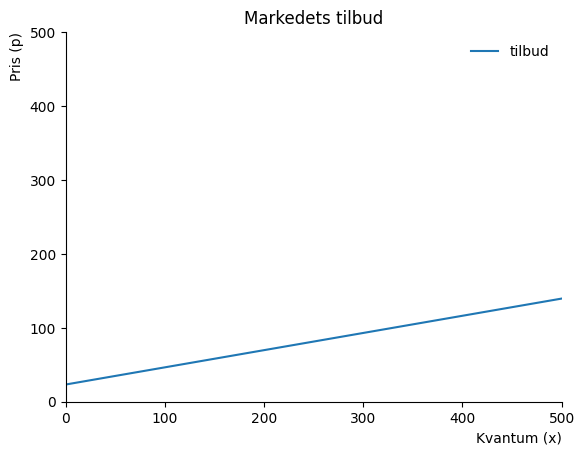

In [139]:
#lag en akse som vi skal bruke flere ganger
p_num = np.linspace(0.1,300,300)
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,500))
                ax.set(ylim=(0,500))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(x_s(p_num, 0),p_num, label='tilbud')


# tittel
ax.set_title('Markedets tilbud')

#vis navnene:
ax.legend(loc='best',frameon=False);

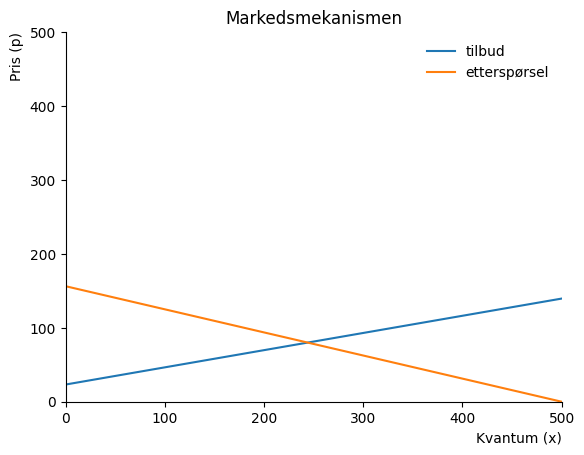

In [140]:
fig, ax = create_ax()

ax.plot(x_s(p_num,0), p_num ,label='tilbud')
ax.plot(x_d(p_num), p_num ,label='etterspørsel')


ax.set_title('Markedsmekanismen')

ax.legend(loc='best', frameon=False);

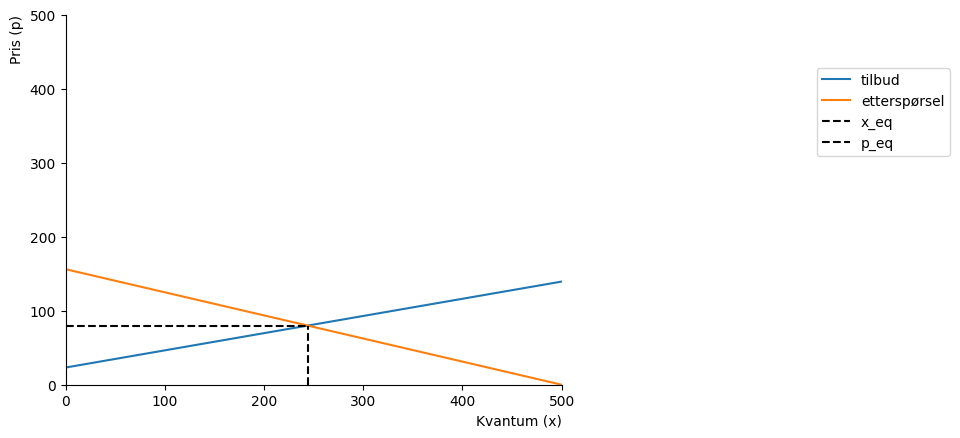

In [141]:
fig, ax = create_ax()

ax.plot(x_s(p_num,0), p_num ,label='tilbud')
ax.plot(x_d(p_num), p_num ,label='etterspørsel')


ax.vlines(x_eq(0),0,p_eq(0), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq(0),0,x_eq(0), color='black',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

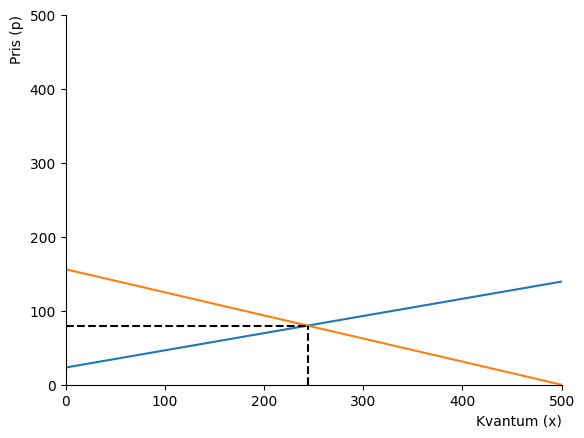

In [142]:
fig, ax = create_ax()

ax.plot(x_s(p_num,0), p_num ,label='tilbud')
ax.plot(x_d(p_num), p_num ,label='etterspørsel')


ax.vlines(x_eq(0),0,p_eq(0), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq(0),0,x_eq(0), color='black',ls='dashed', label='p_eq')

ax.fill_between(x_s(p_num,0),p_eq,x_eq(0), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(x_d(p_num),p_num,p_eq(0), color = "red",alpha = 0.3,label='Produsentoverskudd')
ax.legend(bbox_to_anchor=(1.5,0.6))

In [ ]:
x,p,t=sp.symbols('x p t', real=True, positive=True)
eq_supply = sp.Eq(supply(p,0), x)
eq_demand = sp.Eq(demand(p), x)

sol_dict = sp.solve ((eq_supply, eq_demand), (p,x))

# løsningen er et oppslag (dictionary)
# vi får hver løsning ved å bruke sol_dict[p] og sol_dict[x]
sol_dict

In [ ]:
p_num = np.linspace(0,110,100)

fig, ax = create_ax()

ax.plot(x_s(p_num,0), p_num ,label='tilbud')
ax.plot(x_d(p_num), p_num ,label='etterspørsel')

# sett inn linjer for likevekten

ax.plot ([0,sol_dict[x]], [sol_dict[p], sol_dict[p]], linestyle='dashed', color='black')
ax.plot ([sol_dict[x], sol_dict[x]], [0, sol_dict[p]], linestyle='dashed', color='black')

#sett inn likevektstall


ax.set_title('Markedslikevekt')

ax.legend(loc='best', frameon=False);

Oppgave 4